## second hand cars data analysis 
## data scraping done in cars 24 website
## 

## importing librareys

In [1]:
import numpy as np
import pandas as pd
import re
import requests
from bs4 import BeautifulSoup

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

##  data scraping from cars 24 webiste

In [38]:
list_of_companys = ['datsun','hyundi','honda','maruti','renault','tata','volkswagen','toyota']
list_of_citycode = [2378,2,3686,1692,4709,134,777]



Car_price = []
car_brand=[]
car_model_year = []
car_name = []
model_car = []
gare_type = []
KM_car = []
owner_type = []
fuel_type = []
state = []


for companys in list_of_companys:
                 
   
    for city in list_of_citycode:

        url = f'''https://www.cars24.com/buy-used-car?f=make%3A%3D%3A{companys}&sort=bestmatch
            &serveWarrantyCount=true&listingSource=Homepage_Filters&storeCityId={city}'''   

        
        
        

        car_g = requests.get(url)
        car_g
        car_soup = BeautifulSoup(car_g.text)
        CAR = car_soup.find_all('span')
        price = car_soup.find_all('div', class_="_18ToE")


        for t in price:
            a = t.text
            b = re.findall(r'(₹\d+,\d+,\d+)',a)
            if len(b) > 0 :
                Car_price.append(b[0])

                # Car_price
            else:
                Car_price.append(np.nan)

        year_car = car_soup.find_all('h2', class_="_2lmIw")

        for y in year_car:
            a = y.text
            b = re.findall(r'\d+',a)
            if len(b) > 0:
                car_model_year.append(b[0])

            else:
                car_model_year.append(np.nan)
                # car_model_year

        C_name = car_soup.find_all('h2', class_="_2lmIw")

        for u in C_name:
            a = u.text
            b = re.findall(r'\s\w+\s',a)
            if len(b) > 0:
                car_brand.append(b[0])
            else:
                car_brand.append(np.nan)

                # car_brand

        for o in C_name:
            a = o.text
            b = re.findall(r'\s\w+(\s\w+)', a)
            if len(b) > 0:
                car_name.append(b[0])
                # car_name
            else:
                car_name.append(np.nan)

        car_model = car_soup.find_all('ul', class_="_1hOnS")

        for p in car_model:
            a = p.text
            b = re.findall(r'\w+',a)
            #     print(a)
            if len(b) > 0:
                model_car.append(b[0])
            else:
                model_car.append(np.nan)


        for q in car_model:
            a = q.text
            b = re.findall(r'Manual|Automatic',a)
            if len(b)>0:
                gare_type.append(b[0])
                
            else:
                gare_type.append(np.nan)

        car_km = car_soup.find_all('ul', class_="_13yb6")

        for w in car_km:
            a = w.text
            b = re.findall(r'\d+,\d+',a)
            if len(b) > 0:
                KM_car.append(b[0])
                # KM_car
            else:

                KM_car.append(np.nan)


        owner = car_soup.find_all('ul', class_="_13yb6")
        for e in owner:
            a = e.text
            b = re.findall(r'km(\w+\sOwner)',a)
            if len(b) > 0:
                owner_type.append(b[0])

            else:
                owner_type.append(np.nan)

        fuel = car_soup.find_all('ul', class_="_13yb6")


        for i in fuel:
            a = i.text
                #     print(a)
            b = re.findall(r'Petrol|Diesel|CNG|Electric',a)

            if len(b) > 0:

                fuel_type.append(b[0])

            else:
                fuel_type.append(np.nan)
                #    
        for f in fuel:
            a = i.text
            b = re.findall(r'MH|DL|TS|GJ|KA|UP|WB|HR',a)
            if len(b) > 0:
                state.append(b[0])
            else:
                state.append(np.nan)



                #       
                #     
                # fuel_type
        #     print(fuel_type)



In [39]:
df_dict  = {
    
    'COMPANY' : car_brand,
    'CAR NAME' : car_name,
    'CAR MANF YEAR' : car_model_year,
    'TRANSMMISTION' : gare_type,
    'FUEL TYPE' : fuel_type ,
    'PRICE'  : Car_price,
    'DRIVEN KM' : KM_car,
    'OWNER TYPE' : owner_type,
    'LOCATIONs' : state
}

df = pd.DataFrame(df_dict)

df

,COMPANY,CAR NAME,CAR MANF YEAR,TRANSMMISTION,FUEL TYPE,PRICE,DRIVEN KM,OWNER TYPE,LOCATIONs
0,Datsun,Redi,2018,Manual,Petrol,"₹2,92,000","11,500",1st Owner,MH
1,Datsun,Redi,2016,Manual,Petrol,"₹2,53,000","10,724",1st Owner,MH
2,Datsun,Go,2014,Manual,Petrol,"₹2,50,000","18,499",1st Owner,MH
3,Datsun,Redi,2018,Automatic,Petrol,"₹3,38,000","45,531",1st Owner,MH
4,Datsun,Redi,2018,Manual,Petrol,"₹2,89,000","46,291",1st Owner,MH
...,...,...,...,...,...,...,...,...,...
811,Toyota,Etios,2011,Manual,Petrol,"₹2,13,000","55,314",1st Owner,WB
812,Toyota,Corolla,2013,Manual,Petrol,"₹4,34,000","56,766",3rd Owner,WB
813,Toyota,Etios,2014,Manual,Petrol,"₹3,17,000","87,733",2nd Owner,WB
814,Toyota,Corolla,2013,Manual,Diesel,"₹4,16,000","43,285",2nd Owner,WB


In [40]:
a = len(df)
df = df.sample(a)
df = df.reset_index()
df.drop('index',axis = 1,inplace = True)

## This is an scarped data from website

In [41]:
df

,COMPANY,CAR NAME,CAR MANF YEAR,TRANSMMISTION,FUEL TYPE,PRICE,DRIVEN KM,OWNER TYPE,LOCATIONs
0,Toyota,YARIS,2020,Manual,Petrol,"₹7,96,000","41,032",1st Owner,DL
1,Renault,TRIBER,2022,Automatic,Petrol,"₹8,01,000","29,302",1st Owner,TS
2,Renault,Kwid,2020,Automatic,Petrol,"₹4,82,000","12,413",1st Owner,TS
3,Toyota,YARIS,2018,Automatic,Petrol,"₹8,98,000","33,951",1st Owner,TS
4,Maruti,Swift,2017,Manual,Diesel,"₹6,32,000","58,006",1st Owner,TS
...,...,...,...,...,...,...,...,...,...
811,Tata,NEXON,2021,Automatic,Diesel,"₹10,42,000","26,606",1st Owner,GJ
812,Maruti,S,2017,Manual,Diesel,"₹5,85,000","49,727",1st Owner,GJ
813,Maruti,Swift,2020,Manual,Petrol,"₹5,92,000","54,364",1st Owner,GJ
814,Toyota,YARIS,2021,Manual,Petrol,"₹9,85,000","17,875",2nd Owner,KA


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   COMPANY        816 non-null    object
 1   CAR NAME       816 non-null    object
 2   CAR MANF YEAR  816 non-null    object
 3   TRANSMMISTION  816 non-null    object
 4   FUEL TYPE      816 non-null    object
 5   PRICE          816 non-null    object
 6   DRIVEN KM      816 non-null    object
 7   OWNER TYPE     816 non-null    object
 8   LOCATIONs      816 non-null    object
dtypes: object(9)
memory usage: 57.5+ KB


## Data Cleaning 

### Cheecking duplicates

In [43]:
df.duplicated().value_counts()

False    742
True      74
dtype: int64

In [54]:
df = df.drop_duplicates()

In [55]:
df

,COMPANY,CAR NAME,CAR MANF YEAR,TRANSMMISTION,FUEL TYPE,PRICE,DRIVEN KM,OWNER TYPE,LOCATIONs
0,Toyota,YARIS,2020,Manual,Petrol,"₹7,96,000","41,032",1st Owner,DL
1,Renault,TRIBER,2022,Automatic,Petrol,"₹8,01,000","29,302",1st Owner,TS
2,Renault,Kwid,2020,Automatic,Petrol,"₹4,82,000","12,413",1st Owner,TS
3,Toyota,YARIS,2018,Automatic,Petrol,"₹8,98,000","33,951",1st Owner,TS
4,Maruti,Swift,2017,Manual,Diesel,"₹6,32,000","58,006",1st Owner,TS
...,...,...,...,...,...,...,...,...,...
811,Tata,NEXON,2021,Automatic,Diesel,"₹10,42,000","26,606",1st Owner,GJ
812,Maruti,S,2017,Manual,Diesel,"₹5,85,000","49,727",1st Owner,GJ
813,Maruti,Swift,2020,Manual,Petrol,"₹5,92,000","54,364",1st Owner,GJ
814,Toyota,YARIS,2021,Manual,Petrol,"₹9,85,000","17,875",2nd Owner,KA


In [58]:
df.duplicated().value_counts()

False    742
dtype: int64

### cheeking null values

In [59]:
df.isna().sum()

COMPANY          0
CAR NAME         0
CAR MANF YEAR    0
TRANSMMISTION    0
FUEL TYPE        0
PRICE            0
DRIVEN KM        0
OWNER TYPE       0
LOCATIONs        0
dtype: int64

### removing un-wanted things based on columns

In [60]:
df['PRICE'] = df['PRICE'].str.replace(',' ,'')
df['PRICE'] = df['PRICE'].str.replace('₹','')
df['DRIVEN KM'] = df['DRIVEN KM'].str.replace(',' , '')

In [61]:
df = df.reset_index()
df.drop('index' ,axis = 1 ,inplace = True)

In [62]:
df

,COMPANY,CAR NAME,CAR MANF YEAR,TRANSMMISTION,FUEL TYPE,PRICE,DRIVEN KM,OWNER TYPE,LOCATIONs
0,Toyota,YARIS,2020,Manual,Petrol,796000,41032,1st Owner,DL
1,Renault,TRIBER,2022,Automatic,Petrol,801000,29302,1st Owner,TS
2,Renault,Kwid,2020,Automatic,Petrol,482000,12413,1st Owner,TS
3,Toyota,YARIS,2018,Automatic,Petrol,898000,33951,1st Owner,TS
4,Maruti,Swift,2017,Manual,Diesel,632000,58006,1st Owner,TS
...,...,...,...,...,...,...,...,...,...
737,Tata,NEXON,2021,Automatic,Diesel,1042000,26606,1st Owner,GJ
738,Maruti,S,2017,Manual,Diesel,585000,49727,1st Owner,GJ
739,Maruti,Swift,2020,Manual,Petrol,592000,54364,1st Owner,GJ
740,Toyota,YARIS,2021,Manual,Petrol,985000,17875,2nd Owner,KA


In [63]:
df['CAR MANF YEAR']=pd.to_datetime(df['CAR MANF YEAR'])

In [64]:
df['CAR MANF YEAR']=(df['CAR MANF YEAR'].dt.year)

In [65]:
df

,COMPANY,CAR NAME,CAR MANF YEAR,TRANSMMISTION,FUEL TYPE,PRICE,DRIVEN KM,OWNER TYPE,LOCATIONs
0,Toyota,YARIS,2020,Manual,Petrol,796000,41032,1st Owner,DL
1,Renault,TRIBER,2022,Automatic,Petrol,801000,29302,1st Owner,TS
2,Renault,Kwid,2020,Automatic,Petrol,482000,12413,1st Owner,TS
3,Toyota,YARIS,2018,Automatic,Petrol,898000,33951,1st Owner,TS
4,Maruti,Swift,2017,Manual,Diesel,632000,58006,1st Owner,TS
...,...,...,...,...,...,...,...,...,...
737,Tata,NEXON,2021,Automatic,Diesel,1042000,26606,1st Owner,GJ
738,Maruti,S,2017,Manual,Diesel,585000,49727,1st Owner,GJ
739,Maruti,Swift,2020,Manual,Petrol,592000,54364,1st Owner,GJ
740,Toyota,YARIS,2021,Manual,Petrol,985000,17875,2nd Owner,KA


In [66]:
df.to_csv('final data cars.csv') # data stored in final data cars as csv

In [67]:
df1 = pd.read_csv('final data cars.csv')
df1

,Unnamed: 0,COMPANY,CAR NAME,CAR MANF YEAR,TRANSMMISTION,FUEL TYPE,PRICE,DRIVEN KM,OWNER TYPE,LOCATIONs
0,0,Toyota,YARIS,2020,Manual,Petrol,796000,41032,1st Owner,DL
1,1,Renault,TRIBER,2022,Automatic,Petrol,801000,29302,1st Owner,TS
2,2,Renault,Kwid,2020,Automatic,Petrol,482000,12413,1st Owner,TS
3,3,Toyota,YARIS,2018,Automatic,Petrol,898000,33951,1st Owner,TS
4,4,Maruti,Swift,2017,Manual,Diesel,632000,58006,1st Owner,TS
...,...,...,...,...,...,...,...,...,...,...
737,737,Tata,NEXON,2021,Automatic,Diesel,1042000,26606,1st Owner,GJ
738,738,Maruti,S,2017,Manual,Diesel,585000,49727,1st Owner,GJ
739,739,Maruti,Swift,2020,Manual,Petrol,592000,54364,1st Owner,GJ
740,740,Toyota,YARIS,2021,Manual,Petrol,985000,17875,2nd Owner,KA


In [68]:
df1.drop('Unnamed: 0', axis = 1 , inplace = True)

In [69]:
df1

,COMPANY,CAR NAME,CAR MANF YEAR,TRANSMMISTION,FUEL TYPE,PRICE,DRIVEN KM,OWNER TYPE,LOCATIONs
0,Toyota,YARIS,2020,Manual,Petrol,796000,41032,1st Owner,DL
1,Renault,TRIBER,2022,Automatic,Petrol,801000,29302,1st Owner,TS
2,Renault,Kwid,2020,Automatic,Petrol,482000,12413,1st Owner,TS
3,Toyota,YARIS,2018,Automatic,Petrol,898000,33951,1st Owner,TS
4,Maruti,Swift,2017,Manual,Diesel,632000,58006,1st Owner,TS
...,...,...,...,...,...,...,...,...,...
737,Tata,NEXON,2021,Automatic,Diesel,1042000,26606,1st Owner,GJ
738,Maruti,S,2017,Manual,Diesel,585000,49727,1st Owner,GJ
739,Maruti,Swift,2020,Manual,Petrol,592000,54364,1st Owner,GJ
740,Toyota,YARIS,2021,Manual,Petrol,985000,17875,2nd Owner,KA


In [70]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   COMPANY        742 non-null    object
 1   CAR NAME       742 non-null    object
 2   CAR MANF YEAR  742 non-null    int64 
 3   TRANSMMISTION  742 non-null    object
 4   FUEL TYPE      742 non-null    object
 5   PRICE          742 non-null    int64 
 6   DRIVEN KM      742 non-null    int64 
 7   OWNER TYPE     742 non-null    object
 8   LOCATIONs      742 non-null    object
dtypes: int64(3), object(6)
memory usage: 52.3+ KB


## Exploratory Data Analysis

In [71]:
df1.describe()

,CAR MANF YEAR,PRICE,DRIVEN KM
count,742.000000,7.420000e+02,742.000000
mean,2017.345013,5.837268e+05,45098.028302
std,2.910653,2.872906e+05,26481.525241
min,2010.000000,1.180000e+05,100.000000
25%,2016.000000,3.722500e+05,25004.750000
50%,2018.000000,5.415000e+05,43886.000000
75%,2019.000000,7.400000e+05,65479.500000
max,2022.000000,2.164000e+06,99943.000000


In [72]:
df1.head()

,COMPANY,CAR NAME,CAR MANF YEAR,TRANSMMISTION,FUEL TYPE,PRICE,DRIVEN KM,OWNER TYPE,LOCATIONs
0,Toyota,YARIS,2020,Manual,Petrol,796000,41032,1st Owner,DL
1,Renault,TRIBER,2022,Automatic,Petrol,801000,29302,1st Owner,TS
2,Renault,Kwid,2020,Automatic,Petrol,482000,12413,1st Owner,TS
3,Toyota,YARIS,2018,Automatic,Petrol,898000,33951,1st Owner,TS
4,Maruti,Swift,2017,Manual,Diesel,632000,58006,1st Owner,TS


## disribution of price columns

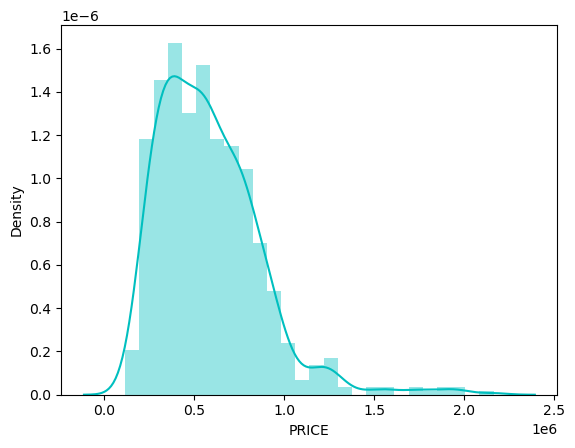

In [73]:
sns.distplot(df1['PRICE'],color = 'c')
plt.show()

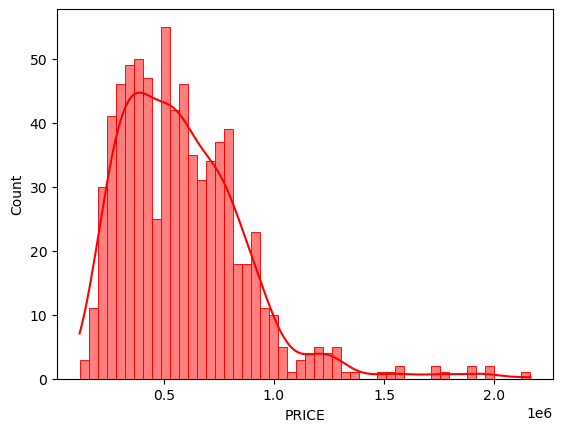

In [74]:
sns.histplot(df1['PRICE'] , bins = 50,kde = True,color = 'r',ec = 'r')
plt.show()

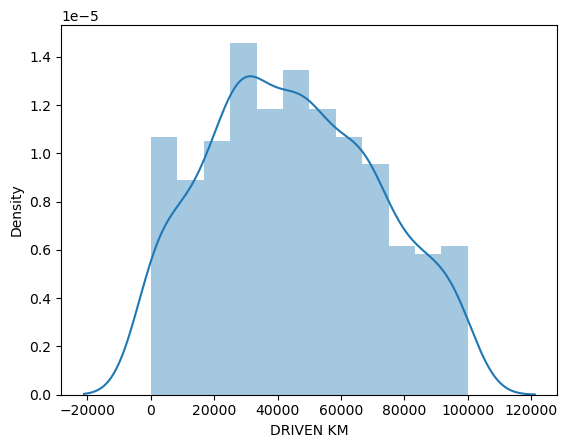

In [75]:
sns.distplot(df1['DRIVEN KM'])
plt.show()

## outlayers detection

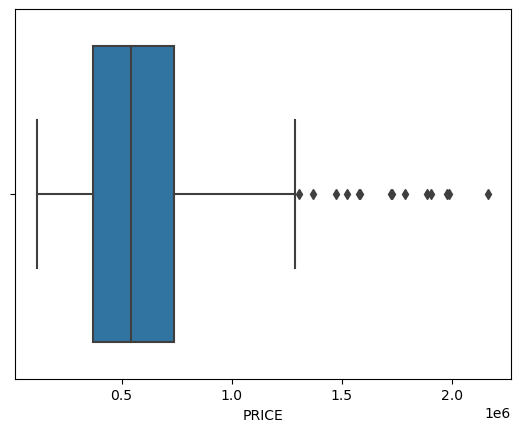

In [76]:
sns.boxplot(df1['PRICE'])
plt.show()

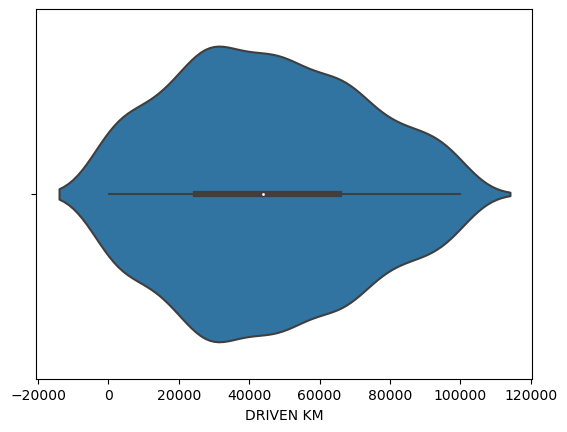

In [77]:
sns.violinplot(df1['DRIVEN KM'],)
plt.show()

## Univariate analysis

In [78]:
df.head()

,COMPANY,CAR NAME,CAR MANF YEAR,TRANSMMISTION,FUEL TYPE,PRICE,DRIVEN KM,OWNER TYPE,LOCATIONs
0,Toyota,YARIS,2020,Manual,Petrol,796000,41032,1st Owner,DL
1,Renault,TRIBER,2022,Automatic,Petrol,801000,29302,1st Owner,TS
2,Renault,Kwid,2020,Automatic,Petrol,482000,12413,1st Owner,TS
3,Toyota,YARIS,2018,Automatic,Petrol,898000,33951,1st Owner,TS
4,Maruti,Swift,2017,Manual,Diesel,632000,58006,1st Owner,TS


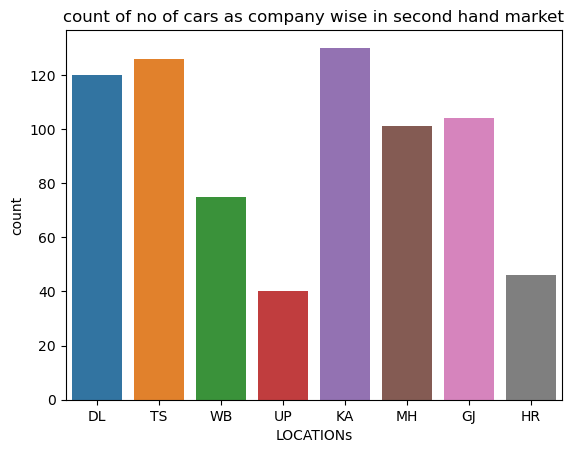

In [79]:
sns.countplot(x = df['LOCATIONs'])
plt.title('count of no of cars as company wise in second hand market')
plt.show()

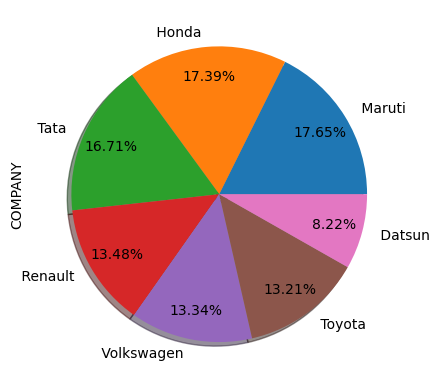

In [80]:
df['COMPANY'].value_counts().plot(kind = 'pie', autopct = '%0.2F%%',shadow = True,pctdistance=0.8,)
plt.show()

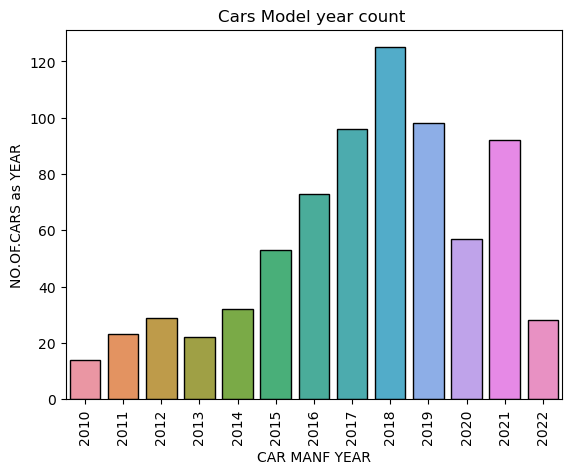

In [81]:
sns.countplot(df1['CAR MANF YEAR'],ec = 'k')
plt.xticks(rotation = 90)
plt.title('Cars Model year count ')
plt.ylabel('NO.OF.CARS as YEAR')
plt.show()

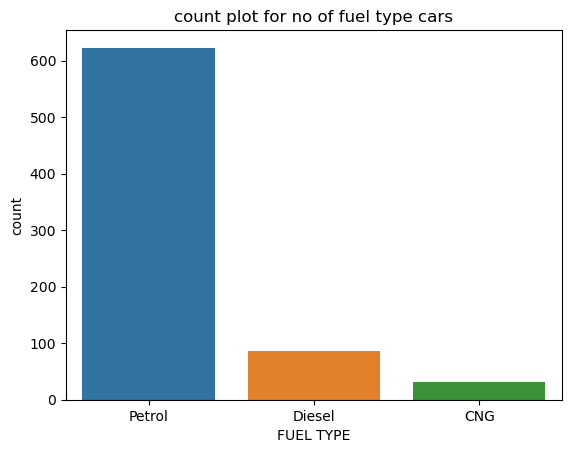

In [82]:
sns.countplot(df1['FUEL TYPE'])
plt.title('count plot for no of fuel type cars')
plt.show()

## Bi- variate analysis

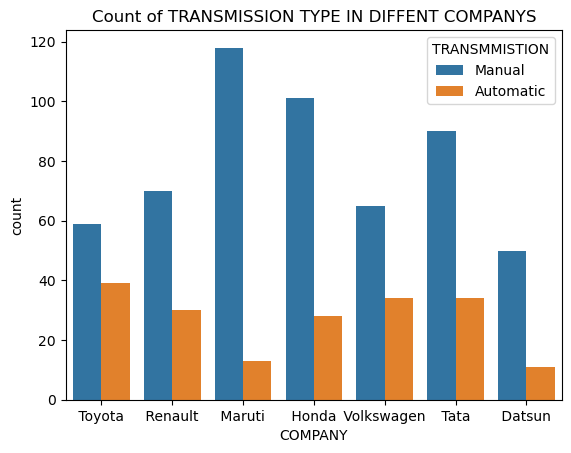

In [83]:
sns.countplot(df1['COMPANY'],hue = df1['TRANSMMISTION'])
plt.title('Count of TRANSMISSION TYPE IN DIFFENT COMPANYS')
plt.show()

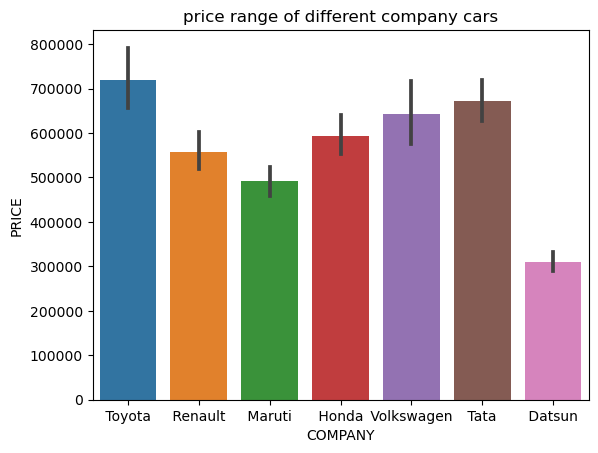

In [84]:
sns.barplot(df1['COMPANY'],df1['PRICE'])
plt.title('price range of different company cars')
plt.show()


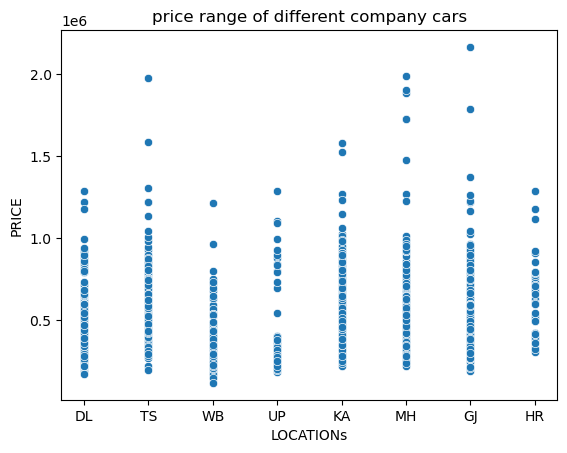

In [85]:
sns.scatterplot(df1['LOCATIONs'],df1['PRICE'])
plt.title('price range of different company cars')
plt.show()

In [86]:
df1.head()

,COMPANY,CAR NAME,CAR MANF YEAR,TRANSMMISTION,FUEL TYPE,PRICE,DRIVEN KM,OWNER TYPE,LOCATIONs
0,Toyota,YARIS,2020,Manual,Petrol,796000,41032,1st Owner,DL
1,Renault,TRIBER,2022,Automatic,Petrol,801000,29302,1st Owner,TS
2,Renault,Kwid,2020,Automatic,Petrol,482000,12413,1st Owner,TS
3,Toyota,YARIS,2018,Automatic,Petrol,898000,33951,1st Owner,TS
4,Maruti,Swift,2017,Manual,Diesel,632000,58006,1st Owner,TS


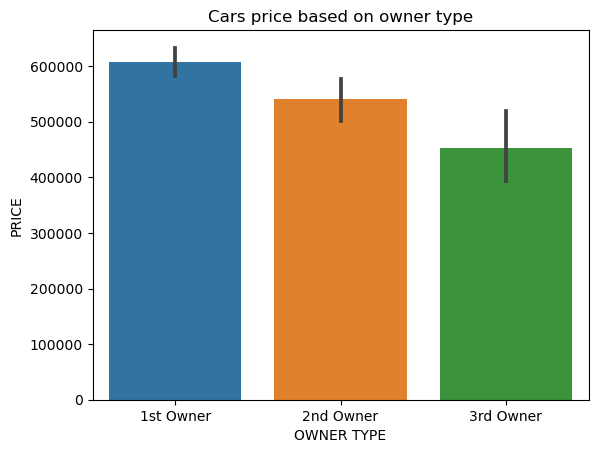

In [87]:
sns.barplot(df1['OWNER TYPE'],df1['PRICE'])
plt.title('Cars price based on owner type')
plt.show()

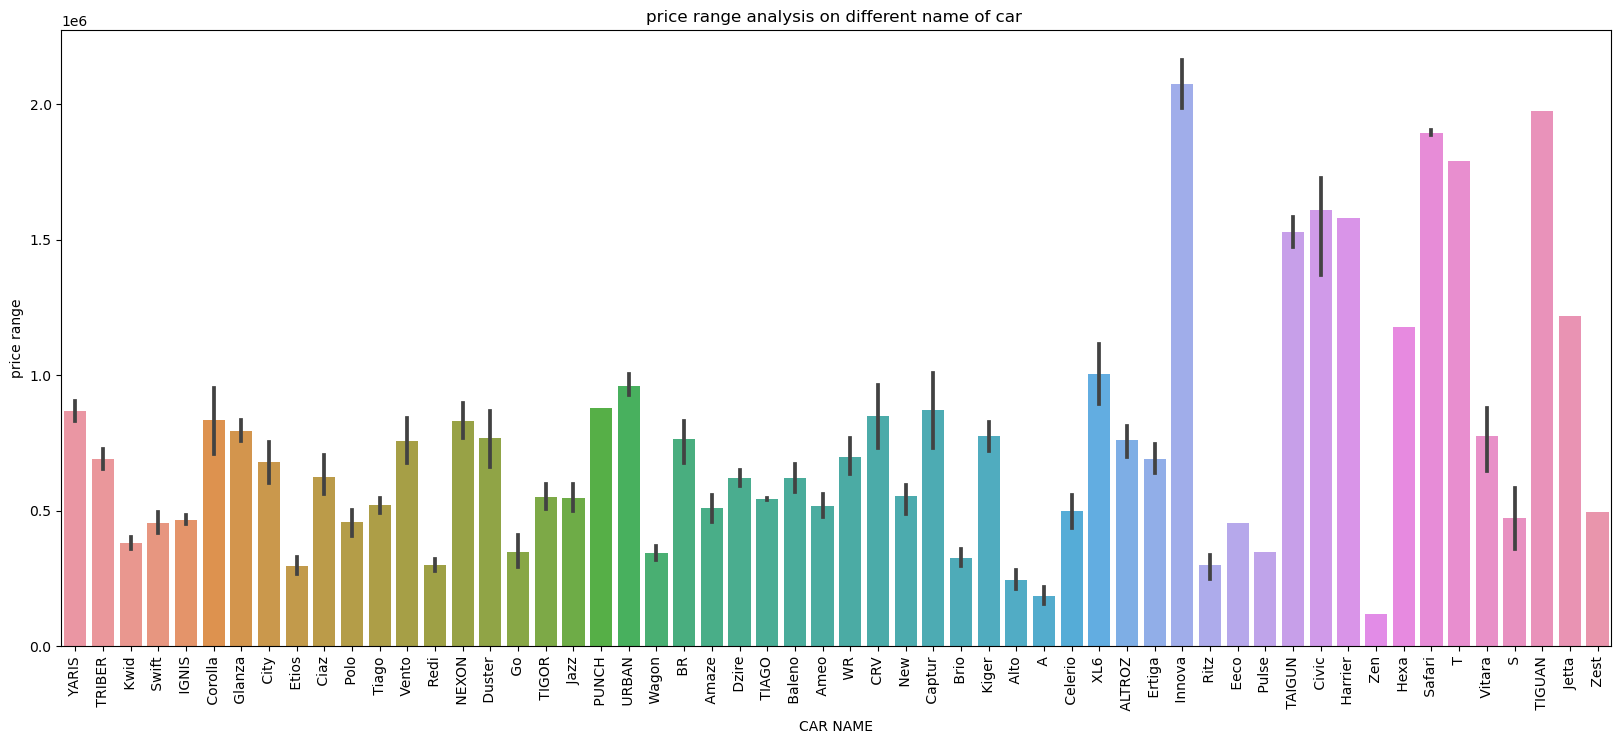

In [88]:
plt.figure(figsize=(20,8))
sns.barplot(x = df1['CAR NAME'],y = df1['PRICE'])
plt.title('price range analysis on different name of car ')
plt.xticks(rotation = 90)
plt.ylabel('price range')
plt.show()

## Multivariate analysis

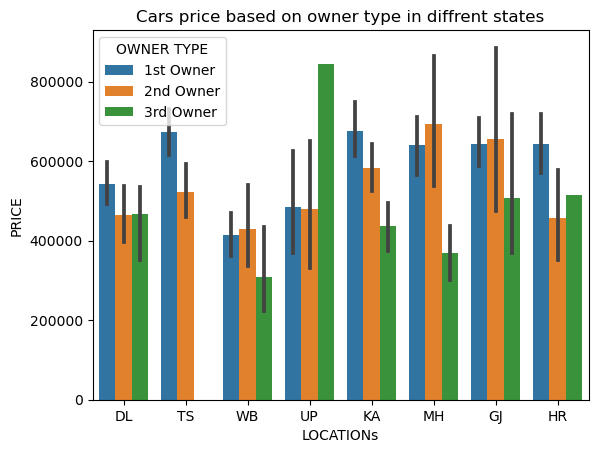

In [102]:
sns.barplot(df['LOCATIONs'],df1['PRICE'],hue = df1['OWNER TYPE'])
plt.title('Cars price based on owner type in diffrent states')
plt.show()

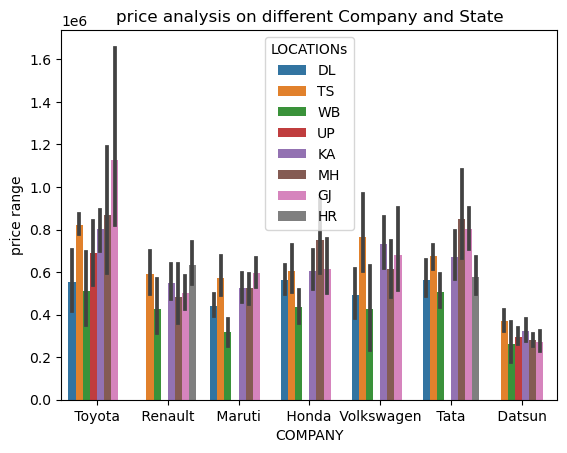

In [103]:
sns.barplot(x = df1['COMPANY'],y = df1['PRICE'],hue = df1['LOCATIONs'])
plt.title('price analysis on different Company and State')
plt.ylabel('price range')
plt.show()


In [104]:
dfh = pd.crosstab(index = df1['OWNER TYPE'],columns = df1['COMPANY'])
dfh

COMPANY,Datsun,Honda,Maruti,Renault,Tata,Toyota,Volkswagen
OWNER TYPE,,,,,,,
1st Owner,47,83,92,75,99,59,60
2nd Owner,14,38,31,25,22,35,37
3rd Owner,0,8,8,0,3,4,2


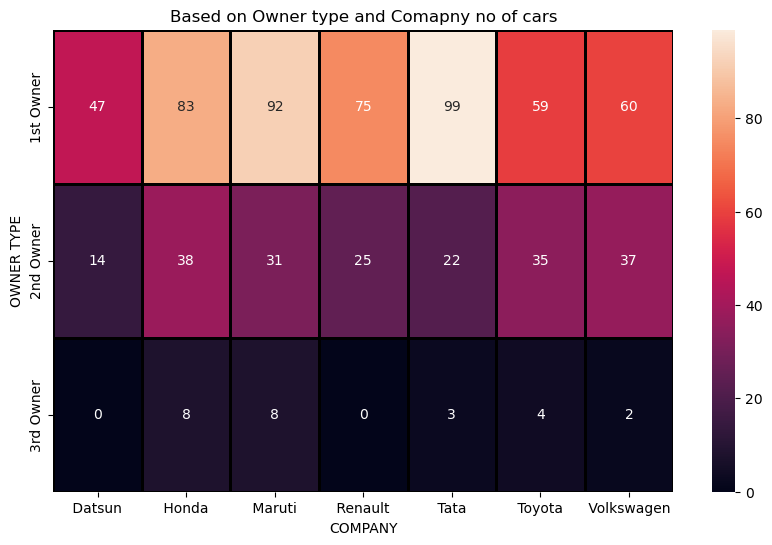

In [105]:
plt.figure(figsize=(10,6))
sns.heatmap(dfh, linecolor = 'k' , linewidth = 2 , annot = True)
plt.title('Based on Owner type and Comapny no of cars')
plt.show()

In [106]:
dfh1 = pd.crosstab(index = df1['OWNER TYPE'],columns = df1['LOCATIONs'])
dfh1

LOCATIONs,DL,GJ,HR,KA,MH,TS,UP,WB
OWNER TYPE,,,,,,,,
1st Owner,83,82,37,72,77,89,26,49
2nd Owner,34,17,8,48,22,37,13,23
3rd Owner,3,5,1,10,2,0,1,3


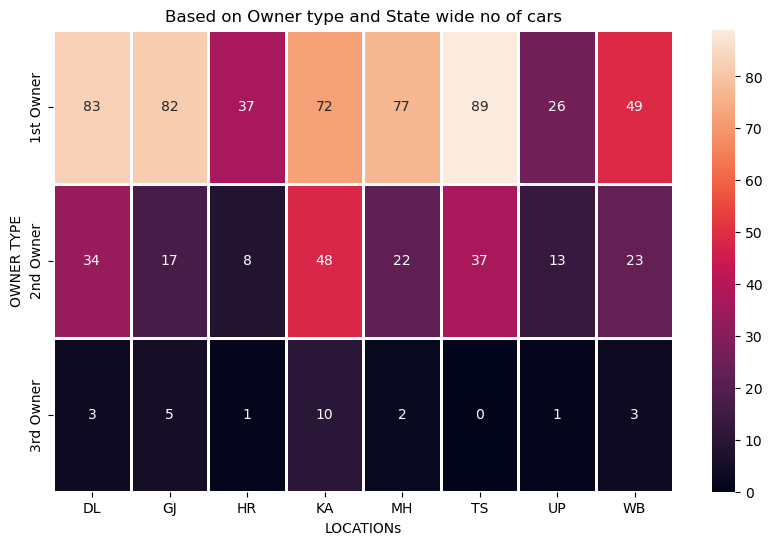

In [107]:
plt.figure(figsize=(10,6))
sns.heatmap(dfh1,ec = 'k',linewidth = 2 , annot = True)
plt.title('Based on Owner type and State wide no of cars')
plt.show()

### Top 10 Cars having least & highest prices in different locations?

In [108]:
df1.head()

,COMPANY,CAR NAME,CAR MANF YEAR,TRANSMMISTION,FUEL TYPE,PRICE,DRIVEN KM,OWNER TYPE,LOCATIONs
0,Toyota,YARIS,2020,Manual,Petrol,796000,41032,1st Owner,DL
1,Renault,TRIBER,2022,Automatic,Petrol,801000,29302,1st Owner,TS
2,Renault,Kwid,2020,Automatic,Petrol,482000,12413,1st Owner,TS
3,Toyota,YARIS,2018,Automatic,Petrol,898000,33951,1st Owner,TS
4,Maruti,Swift,2017,Manual,Diesel,632000,58006,1st Owner,TS


In [109]:
df1.sort_values(by = 'PRICE',ascending = False).head(10)


,COMPANY,CAR NAME,CAR MANF YEAR,TRANSMMISTION,FUEL TYPE,PRICE,DRIVEN KM,OWNER TYPE,LOCATIONs
560,Toyota,Innova,2021,Manual,Diesel,2164000,17721,2nd Owner,GJ
185,Toyota,Innova,2020,Manual,Diesel,1984000,47338,2nd Owner,MH
592,Volkswagen,TIGUAN,2018,Automatic,Diesel,1975000,92569,1st Owner,TS
510,Tata,Safari,2021,Automatic,Diesel,1903000,14915,2nd Owner,MH
469,Tata,Safari,2021,Manual,Diesel,1885000,32656,1st Owner,MH
516,Volkswagen,T,2019,Automatic,Petrol,1788000,34211,1st Owner,GJ
411,Honda,Civic,2019,Automatic,Petrol,1728000,24520,1st Owner,MH
535,Honda,Civic,2020,Automatic,Petrol,1724000,30097,1st Owner,MH
403,Volkswagen,TAIGUN,2022,Manual,Petrol,1583000,15956,1st Owner,TS
414,Tata,Harrier,2019,Manual,Diesel,1578000,28315,1st Owner,KA


In [110]:
df1.sort_values(by = 'PRICE',ascending = False).tail(10)

,COMPANY,CAR NAME,CAR MANF YEAR,TRANSMMISTION,FUEL TYPE,PRICE,DRIVEN KM,OWNER TYPE,LOCATIONs
300,Honda,City,2010,Manual,Petrol,190000,114,1st Owner,DL
214,Maruti,Alto,2012,Manual,Petrol,189000,68473,1st Owner,WB
104,Datsun,Redi,2017,Manual,Petrol,186000,26603,1st Owner,UP
216,Maruti,Alto,2014,Manual,Petrol,182000,46318,1st Owner,WB
97,Datsun,Go,2014,Manual,Petrol,176000,62884,1st Owner,WB
262,Maruti,Alto,2014,Manual,Petrol,173000,85119,1st Owner,WB
684,Maruti,Swift,2010,Manual,Petrol,171000,41170,1st Owner,DL
114,Maruti,A,2010,Manual,Petrol,155000,79497,1st Owner,WB
298,Maruti,Alto,2011,Manual,Petrol,150000,42709,1st Owner,WB
415,Maruti,Zen,2010,Manual,Petrol,118000,44057,2nd Owner,WB


## Which Car has lowest price an highest price in Telangana 

In [111]:
dfg = df1.groupby('LOCATIONs')

In [112]:
dft = dfg.get_group('TS')
dft

,COMPANY,CAR NAME,CAR MANF YEAR,TRANSMMISTION,FUEL TYPE,PRICE,DRIVEN KM,OWNER TYPE,LOCATIONs
1,Renault,TRIBER,2022,Automatic,Petrol,801000,29302,1st Owner,TS
2,Renault,Kwid,2020,Automatic,Petrol,482000,12413,1st Owner,TS
3,Toyota,YARIS,2018,Automatic,Petrol,898000,33951,1st Owner,TS
4,Maruti,Swift,2017,Manual,Diesel,632000,58006,1st Owner,TS
21,Renault,Duster,2015,Manual,Diesel,553000,91556,1st Owner,TS
...,...,...,...,...,...,...,...,...,...
700,Maruti,Ritz,2012,Manual,Diesel,313000,118,2nd Owner,TS
705,Renault,TRIBER,2021,Automatic,Petrol,714000,18023,1st Owner,TS
708,Volkswagen,Polo,2016,Manual,Petrol,435200,89240,1st Owner,TS
720,Renault,Kiger,2021,Manual,Petrol,743000,51670,1st Owner,TS


In [113]:
# Highest price car 
dft[dft['PRICE'] == dft['PRICE'].max()]

,COMPANY,CAR NAME,CAR MANF YEAR,TRANSMMISTION,FUEL TYPE,PRICE,DRIVEN KM,OWNER TYPE,LOCATIONs
592,Volkswagen,TIGUAN,2018,Automatic,Diesel,1975000,92569,1st Owner,TS


In [114]:
# Lowest price car 
dft[dft['PRICE'] == dft['PRICE'].min()]

,COMPANY,CAR NAME,CAR MANF YEAR,TRANSMMISTION,FUEL TYPE,PRICE,DRIVEN KM,OWNER TYPE,LOCATIONs
506,Maruti,Alto,2012,Manual,Petrol,199000,77013,2nd Owner,TS


## cars which are 2021 models in location of TS

In [115]:
dft[dft['CAR MANF YEAR'] == 2021]

,COMPANY,CAR NAME,CAR MANF YEAR,TRANSMMISTION,FUEL TYPE,PRICE,DRIVEN KM,OWNER TYPE,LOCATIONs
33,Datsun,Go,2021,Manual,Petrol,578000,48957,1st Owner,TS
40,Toyota,URBAN,2021,Manual,Petrol,926000,5676,1st Owner,TS
93,Honda,WR,2021,Manual,Petrol,896000,29919,1st Owner,TS
99,Renault,Kiger,2021,Manual,Petrol,811000,30423,2nd Owner,TS
101,Tata,NEXON,2021,Manual,Petrol,878000,44641,1st Owner,TS
113,Renault,Kiger,2021,Automatic,Petrol,981000,13505,1st Owner,TS
173,Tata,ALTROZ,2021,Manual,Diesel,852000,61626,1st Owner,TS
190,Maruti,XL6,2021,Automatic,Petrol,1217000,44462,2nd Owner,TS
268,Tata,ALTROZ,2021,Manual,Petrol,760000,12280,1st Owner,TS
269,Datsun,Redi,2021,Manual,Petrol,470000,18569,1st Owner,TS
